## Machine learning on small embedded systems 

### Overall description of the system 

The goal of this work is to develop a PoC to implement Machine learning in a small device for 2 weeks. 

#### Device: 
- IoT device should be in class with a Atmel328p MC in order to demonstrate the ability on similar hardware class. 
- IoT device has constant power supply. 
- IoT device via BLE send both sensor data and results of classification at least once/second 

#### Classification: 

- Should be based on sensor data and a trained ML model. 
- The system shall be able to carry out the classification of at least two (2) different classes based on sensor data. 
- The model should be able to carry out continious prediction based on an input of at least 5 data points (Int16) within one (1) second 

#### Central Unit: ¶  

The system should send sensor/rating outcomes via BLE to a Console app (shall) and mobile app (should) 

In line with the large increase in connected devices creating large amounts of "sensor" data. Where appropriate, trained machine-learning models can carry out huge complex analysis and classification of sensor data and predict trends/classify.
While it is good to be able to send large volumes of data for analysis online, this can be problemmatic if internet connection is critical or injuries/damage could occur. 

### Why? 

It may be advisable to be able to perform analyses in the local environment, called Edge Computing. This can be achived with a computing unit than can receive data from multiple sensors in real time, filter and analyze the data and finally send a "batch" to an online instance for further analysis or user interface. 

In some cases, there may even be a requirement for immediate action without any delays. For example, the local network might be down or overloaded. There may be a safety aspect with possible personal hazards or major financial losses, and then the right solution should be chosen. 

### What 

This work involves implementing such a solution where classification takes place directly in a "thin" IoT device. 

### System overview  
<img src="./images/overview.jpg" alt="Drawing" style="width: 650px;"/>


### Elscheman på relevanta delar
<img src="./images/schmatic_lab-05.png" alt="Drawing" style="width: 500px;"/>

### Conslusions
The temp sensor I had available was not very accurate. Its possible that a sensor with better accuracy could yield better training data

Its intresting to use research work and apply it to your own problem, epecially when information and dokumentation was still under development

It became a part debug and ingenuity to make it work. 
Besides the ML part I got familiar with the BLE protocol and implemented an end-to-end solution with a mobile app.




## Workflow

### 1 Recreate the work (bonsai model) från Microsoft
https://github.com/Microsoft/EdgeML


### 2 Verify it worked on my own hardware
This was done in two steps
Step 1: In a PC environment using the USPS10 dataset (Handwriten digits)
https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#usps
Ref: J. J. Hull. 
A database for handwritten text recognition research. 
IEEE Transactions on Pattern Analysis and Machine Intelligence, 16(5):550-554, May 1994.

Step 2:  Using a custom dataset 


### 3 Runing on atmel238
https://github.com/Microsoft/EdgeML/tree/fixed-point/fixed-point
Get the model runing on the hardware was a bit challenging, the output for this was for arduino and I neede it to be plain C so I could flash it using AVR

### 4 Create custom dataset and train a model
The idea was that I different mobile flashes acted differently, an ML model could be used to classify different phones/flashes.

I started using a photoresistor and sampled light data which I lates analyzed with pandas and matplotlib.

How different flash looked like after sampling data. Here an Iphone 7 and 6
<img src="./images/plot_flash.png" alt="Drawing" style="width: 500px;"/>

(26, 28)

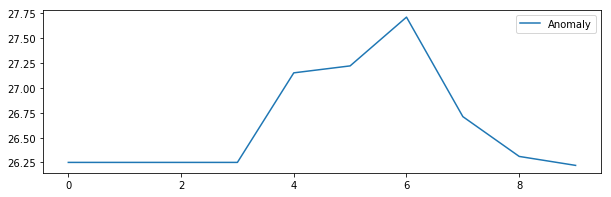

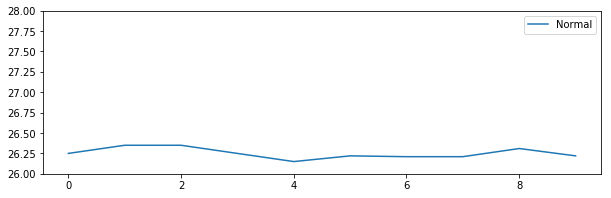

In [86]:
#Data from a temperature sonsor.
from matplotlib import pyplot as plt
import pandas as pd

dataClassOne = [26.25,26.25,26.25,26.25,27.15,27.22,27.71,26.71,26.31,26.22]
dataClassOTwo = [26.25,26.35,26.35,26.25,26.15,26.22,26.21,26.21,26.31,26.22]
df = pd.DataFrame(dataClassOne, columns=['Anomaly'])
df_2 = pd.DataFrame(dataClassOTwo, columns=['Normal'])
df.plot(figsize=(10,3))

df_2.plot(figsize=(10,3))
plt.ylim(26,28)


### Create final dataset

In order to capture flashes and create a dataset i created a sampler(data recorder) program in C.

First I checked how long a flash lasted. For example 2 seconds. (This includes a preflash sequence with lower light)
I assume this is a measuring phase where the phone meassures the the current lightning conditions and adapts the falsh after it.

Then the recoder program would read data from the photoresistor for flashtime + buffer to ensure the sequence is captured without breaks. ex: normal - flash - normal

Lastly the recoder would loop for x times.
For example If i wanted to take 50 samples of flashes from an Iphone5 i would set the loop counter to 50 and then I would make a flash for each round.

I repeted this with 3 differnet kind of phones, taking flashes under the same conditions and distance from the sensor.

Limitations:
This is just an experiment under an isolated environment. In reality the distance between the phone and the sensor, combined with ambient light conditions would greatly alter the recorded data.



### 5 Create AVR software for the sensor in C
The program reads the input data from the sensor with an interval of 10 meassurements/second
The input length of a sample to make a prediction is 20.

In order to start "recording" a sample, I put on a threshold value on the sensor.
Whenever the sensor received a light greater than the ambient value, the recorder would start sampling data.
After the sample is complete, a classification in done.

At the same time the result is sent to the BLE module with correspoding output class.
1, 2 or 3 for each phone.

### BLE Module. 
The Atmel card had a BLE module connected to an UART port, I configured the module as a peripheral and I culd send data using the standard printf command.
The data was then sent to whatever deviced was connected/paired to the BLE module.

### Consol app
* under /bleclient
```
#From /bleclient, module name/UUID hardcoded
npm install
node app.js
```
Simple console BLE app. It will scan for the BLE module and connect to it. It will then print classification results.


### iOS application
(Note, image for demostration. Here I used a temp sensor to predict with a previous model)
<img src="./images/React_app_LAB-05.jpg" alt="Drawing" style="width: 300px;"/>
Using the following lib to use BLE.
* https://github.com/Polidea/react-native-ble-plx
 
* /bleclient/test (react-native, tested on iOS 12)
```
#From /bleclient/react_app
npm install
react-native upgrade
react-native link
react-native run-ios
```


### Security
Due to the short time to make this project work, no security was added to the hardware or software.





#### References
* Hårdvara 
* Ardiuno UNO R3
* MLT-BT05 BLE Module
* TMP36 Temp sensor
-----
* Machine learning:
* https://github.com/Microsoft/EdgeML/tree/master/cpp/src/Bonsai Mahine learning Model (MIT)
* https://github.com/Microsoft/EdgeML/tree/fixed-point/fixed-point Atmel328 Example implementation (MIT)
----
* BLE:
* https://github.com/noble/noble Noble NodeJS (MIT)
* https://github.com/Polidea/react-native-ble-plx React-native app BLE (Apache License 2.0)
* https://facebook.github.io/react-native/ React-native (MIT)
